<a href="https://colab.research.google.com/github/HalaFarouk/IM738_S25/blob/main/My_First_PM_Code_using_cheche_pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

Start with cheche_pm installation

In [69]:
!pip install cheche_pm

In [70]:
import numpy as np
import pandas as pd
from cheche_pm import Project

Create Empty Project Instance

In [71]:
p = Project() # create empty project instance

In [72]:
p.add_activity(activity_name='A',activity_duration = 5, activity_precedence= [None], a_desc= 'F.House', activity_resources=[1,0,0])
p.add_activity(activity_name='B',activity_duration = 2, activity_precedence= [None], a_desc= 'F.Pool', activity_resources=[1,0,0])
p.add_activity(activity_name='C',activity_duration = 5, activity_precedence= ['A'], a_desc= 'Walls', activity_resources=[0,1,0])
p.add_activity(activity_name='D',activity_duration = 6, activity_precedence= ['B'], a_desc= 'Pool', activity_resources=[0,0,1])
p.add_activity(activity_name='E',activity_duration = 5, activity_precedence= ['C'], a_desc= 'Roof', activity_resources=[0,1,0])
p.add_activity(activity_name='F',activity_duration = 2, activity_precedence= ['C'], a_desc= 'Windows', activity_resources=[0,1,0])
p.add_activity(activity_name='G',activity_duration = 3, activity_precedence= ['C'], a_desc= 'Electricity', activity_resources=[0,0,1])
p.add_activity(activity_name='H',activity_duration = 2, activity_precedence= ['E'], a_desc= 'S.Panels', activity_resources=[0,1,0])
p.add_activity(activity_name='I',activity_duration = 4, activity_precedence= ['F'], a_desc= 'Plumbing', activity_resources=[0,1,0])
p.add_activity(activity_name='J',activity_duration = 3, activity_precedence= ['H','I'], a_desc= 'Finishings', activity_resources=[0,1,0])

We could have imported the activities from an Excel sheet.

In [73]:
p = Project.from_excel(filename='Activities RCPSP.xlsx',
                      rcpsp_format=True,
                      n_resources= 2,
                      max_resources=[7,4])

/usr/local/lib/python3.11/dist-packages/cheche_pm/cheche_pm.py:664: UserWarning:

!WARNING: Creating Project data dictionary...



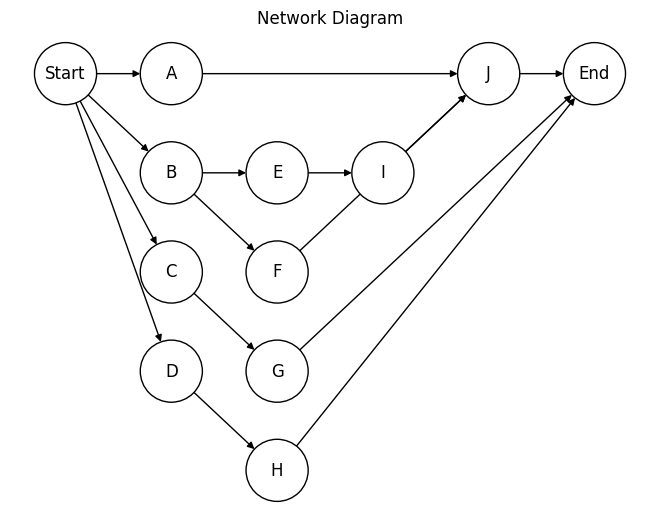

In [74]:
p.plot_network_diagram(plot_type = 'nx')

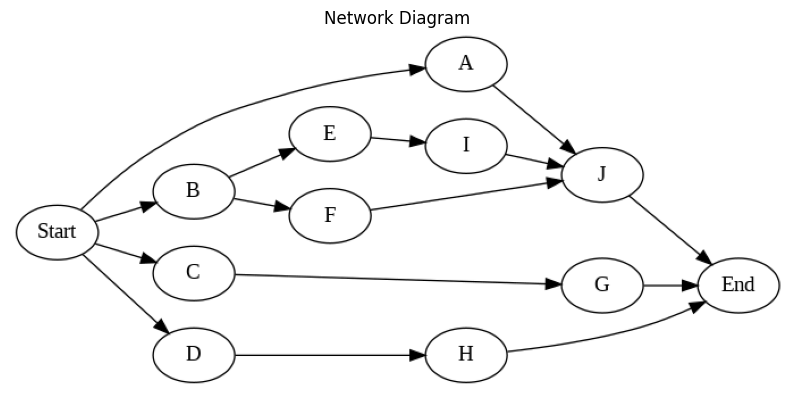

In [75]:
p.plot_network_diagram(plot_type = 'dot')

In [76]:
p.create_project_dict()
out_df = pd.DataFrame(p.PROJECT).T

In [77]:
out_df.to_excel('project_data.xlsx')

In [78]:
p.CPM(verbose=False)

,ES,EF,LS,LF,F,D
Start,0,0,0,0,0,0
A,0,6,0,6,0,6
B,0,1,0,1,0,1
C,0,1,3,4,3,1
D,0,2,5,7,5,2
E,1,4,1,4,0,3
F,1,6,1,6,0,5
G,1,7,4,10,3,6
H,2,5,7,10,5,3
I,4,6,4,6,0,2


In [79]:
cpm_df=pd.DataFrame(p.cpm_schedule).T

In [80]:
cpm_df.to_excel("cpm_data.xlsx")

In [81]:
import os
print(os.getcwd())

/content


In [82]:
p.get_critical_path()

['Start', 'A', 'B', 'E', 'F', 'I', 'J', 'End']

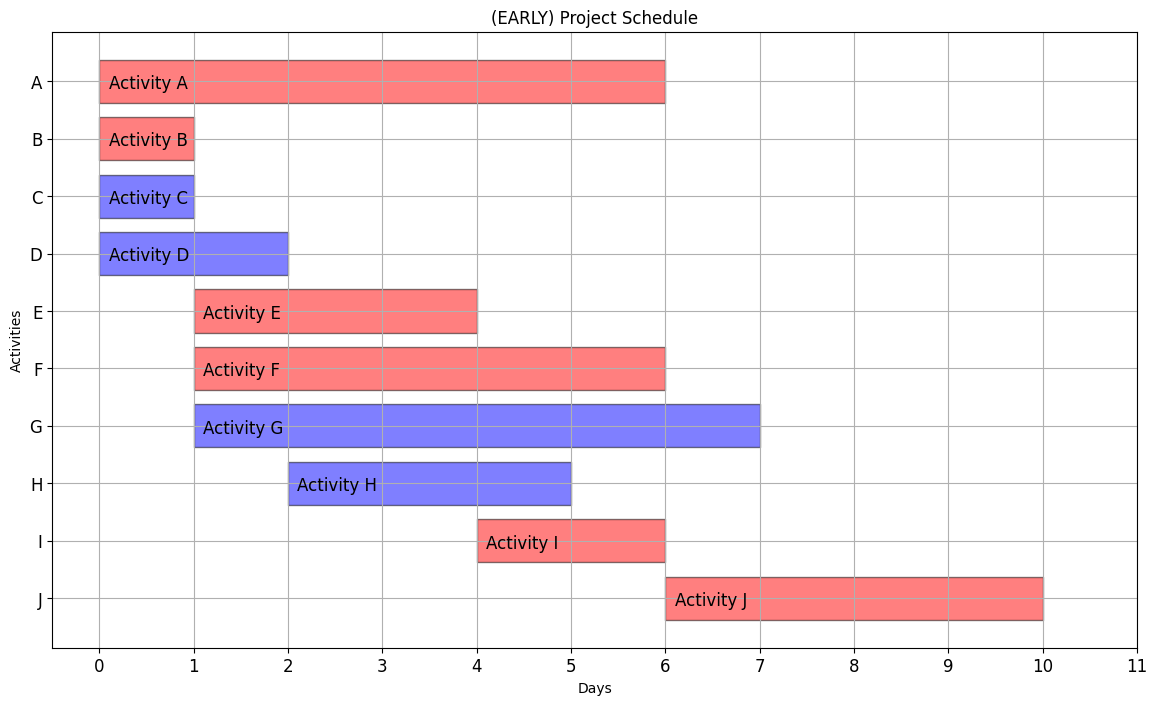

In [83]:
p.plot_gantt_cpm(True,True)

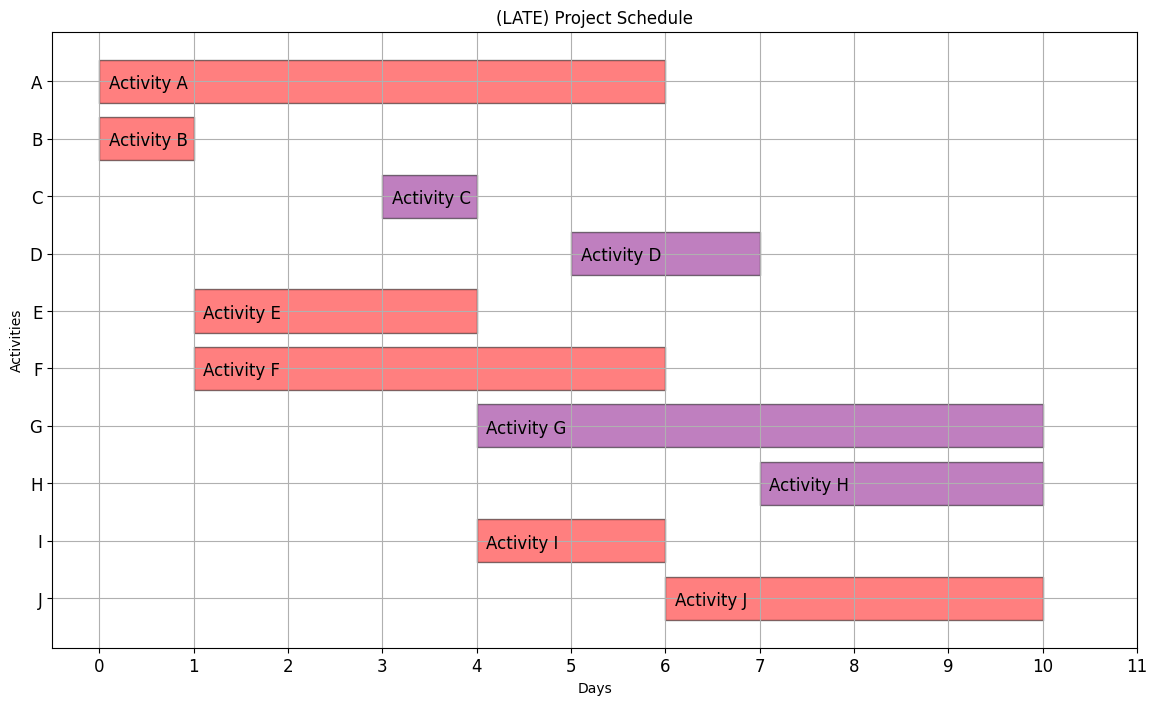

In [84]:
p.plot_gantt_cpm(False,True)

In [85]:
PL = p.get_priority_list(priority_rule= 'GRD',verbose=False,save=True)

In [86]:
ssg = p.SSG(PL,max_resources=[7,4],verbose=False)

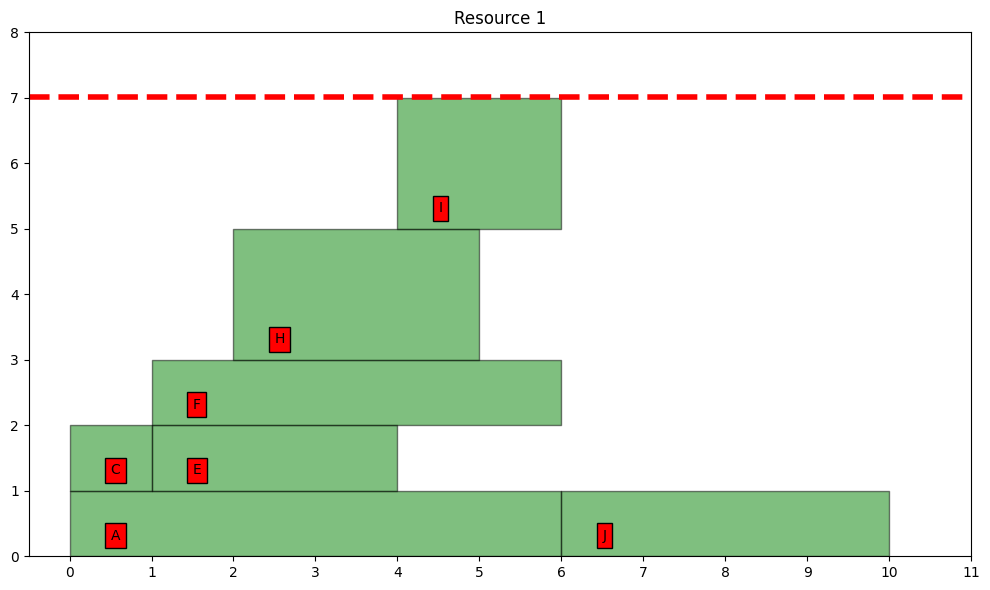

In [87]:
p.RCPSP_plot(ssg)

/usr/local/lib/python3.11/dist-packages/cheche_pm/cheche_pm.py:1135: UserWarning:

!WARNING: Resource level plot for the CPM Schedule



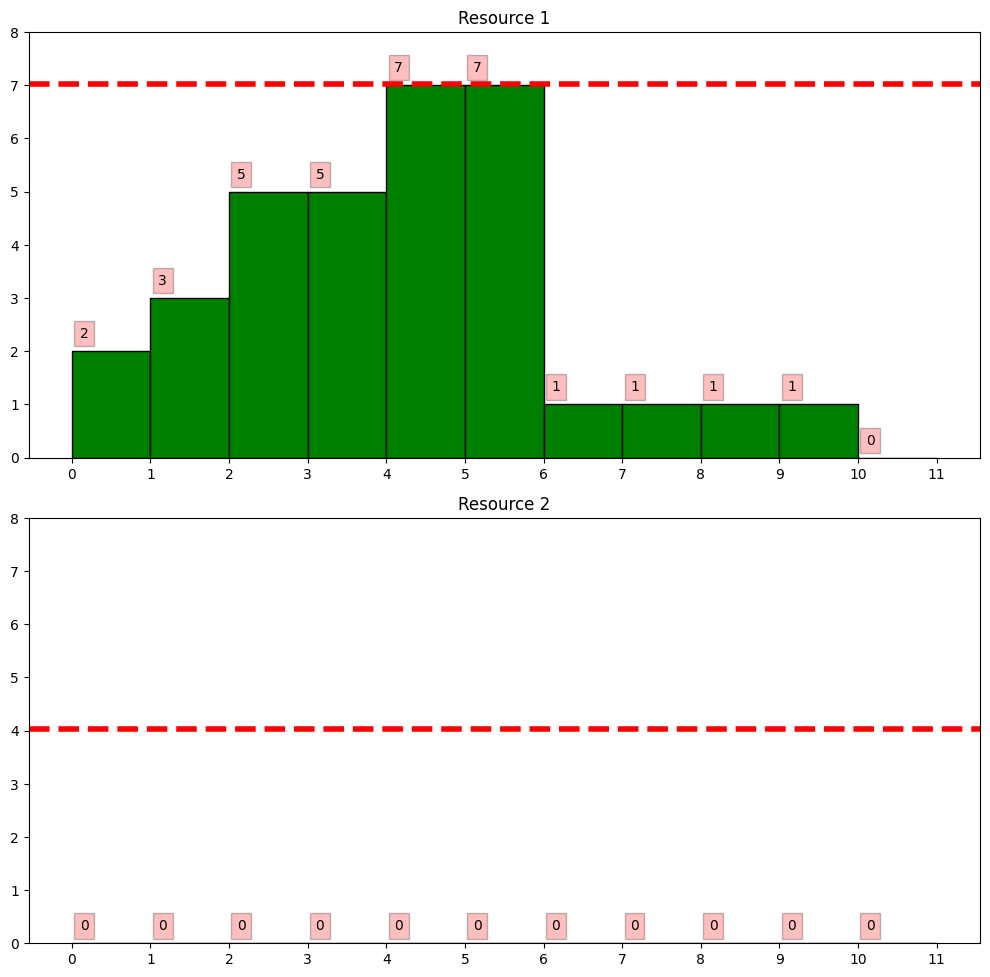

In [88]:
p.plot_resource_levels()

In [89]:
psg = p.PSG(PL,max_resources=[7,4],verbose=False)

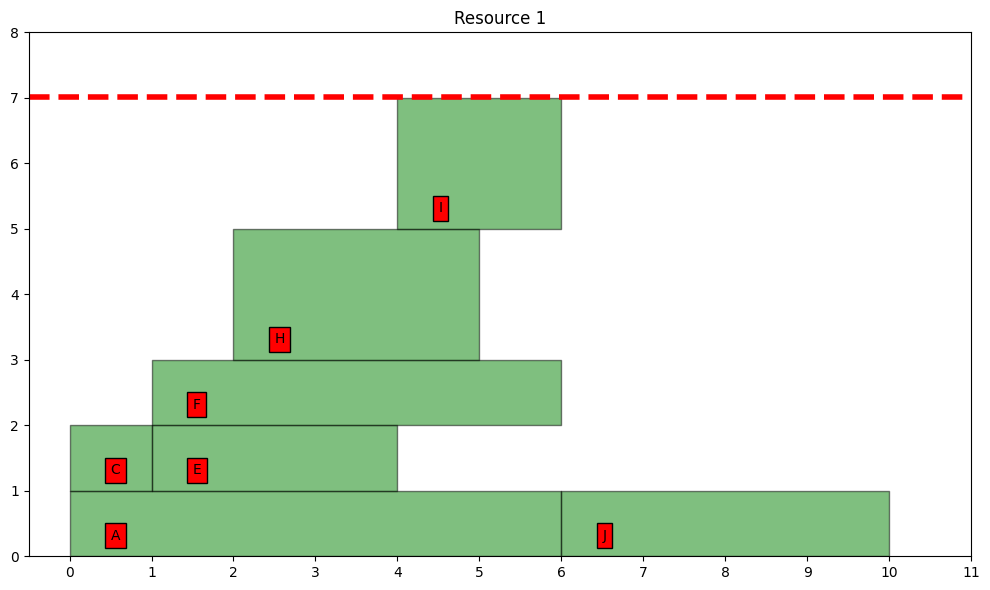

In [90]:
p.RCPSP_plot(psg)

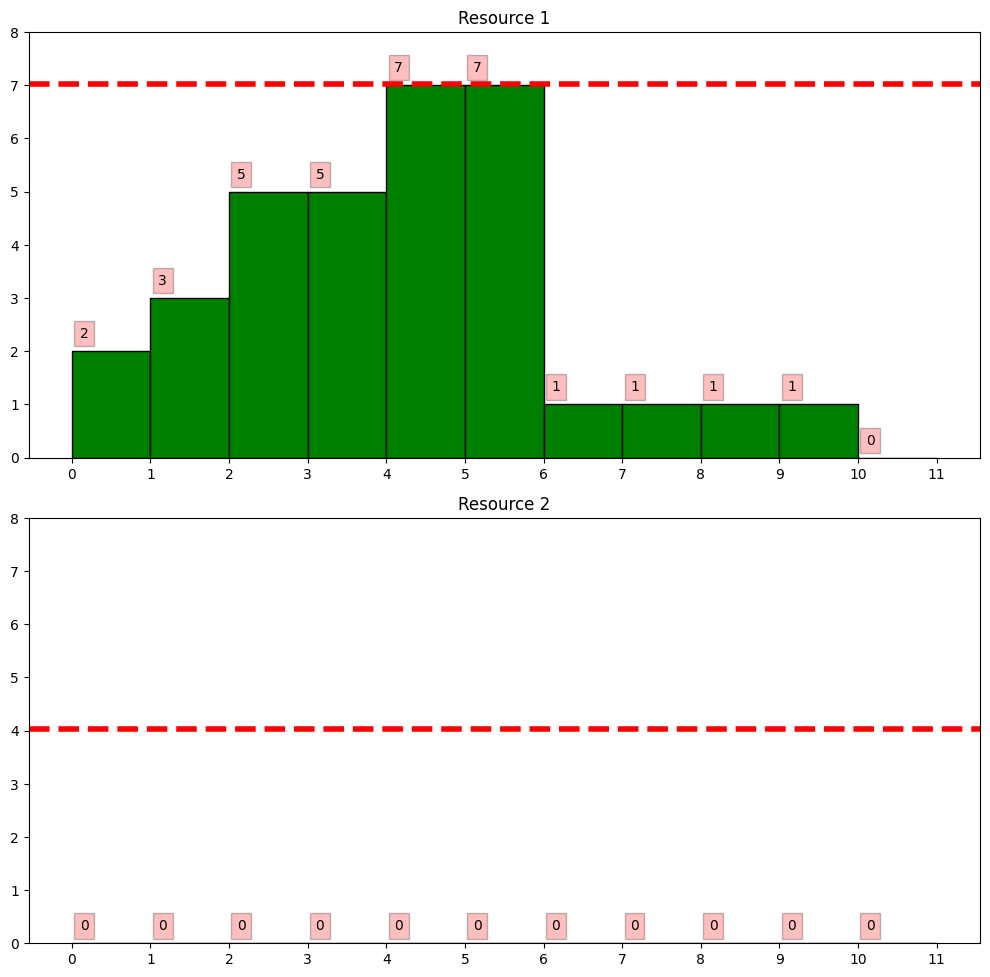

In [91]:
p.plot_resource_levels()

In [92]:
p.run_all_pl_heuristics()

100%|██████████| 24/24 [00:00<00:00, 532.57it/s]


{'PR': 'LPT',
 'schedule_method': 'SSG',
 'solution': {'Start': {'ES': 0, 'EF': 0},
  'A': {'ES': 0, 'EF': 6},
  'D': {'ES': 0, 'EF': 2},
  'H': {'ES': 2, 'EF': 5},
  'B': {'ES': 0, 'EF': 1},
  'F': {'ES': 1, 'EF': 6},
  'E': {'ES': 1, 'EF': 4},
  'I': {'ES': 4, 'EF': 6},
  'J': {'ES': 6, 'EF': 10},
  'C': {'ES': 0, 'EF': 1},
  'G': {'ES': 1, 'EF': 7},
  'End': {'ES': 10, 'EF': 10}},
 'makespan': 10}

In [93]:
w_sche = p.generate_datetime_schedule(solution = psg,start_date="2023-09-03",weekends_work=False,max_resources=[7,4],verbose=True)

Project Schedule duration (10)
Project Calendar duration (10 days 00:00:00)


/usr/local/lib/python3.11/dist-packages/cheche_pm/cheche_pm.py:2242: UserWarning:

!WARNING: Trying date format (%Y-%m-%d) ...



In [94]:
p.plot_date_gantt(w_sche)

In [95]:
p.get_critical_chain(ssg,max_resources=[7,4])

['B', 'D', 'E', 'A', 'F', 'I', 'C', 'J']

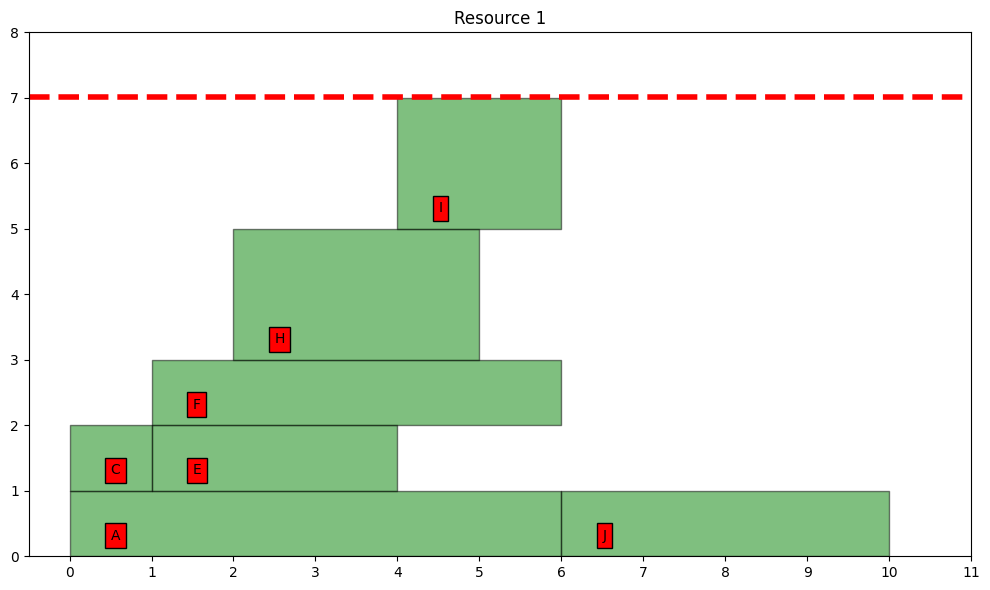

In [96]:
p.RCPSP_plot(ssg,resource_id=0)

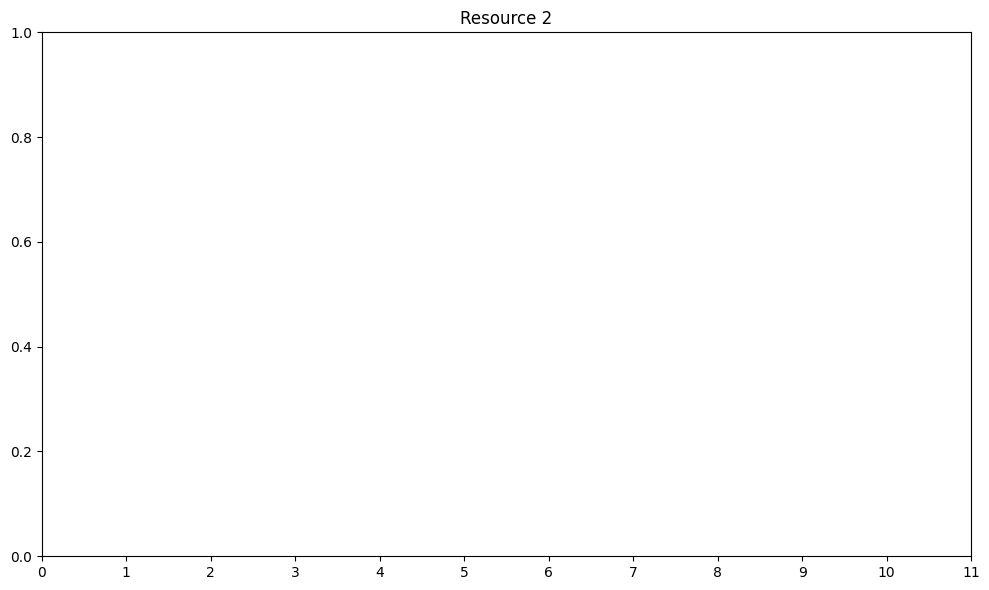

In [97]:
p.RCPSP_plot(ssg,resource_id=1)

In [98]:
!pip install nbconvert